In [1]:
import os
import numpy as np
import pandas as pd

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

classes = pd.read_csv('C:/Users/thoma/Documents/00GitHub/rbc_cnn/dataset.csv')
df = pd.read_pickle('classifications.df.pkl')

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 26 days


In [2]:
classes.columns = ['ID','annotator','cell','h','image','label','pk','w','x','y']

In [3]:
classes.head()

,ID,annotator,cell,h,image,label,pk,w,x,y
0,0,tommy,588,40,681200836HV_002.jpg,Normal,127,42,2794,2216
1,1,tommy,588,40,681200836HV_002.jpg,Normal,128,42,2794,2216
2,7,tommy,1402,41,681200836HV_002.jpg,Normal,134,37,111,1333
3,8,tommy,1314,40,681200836HV_002.jpg,Normal,135,37,1605,1425
4,9,tommy,524,30,681200836HV_002.jpg,Abnormal,136,38,1789,2278


In [4]:
# Normal = 0 , 1 for abnormal 

label_index = pd.read_csv('C:/Users/thoma/Documents/00GitHub/rbc_cnn/notebooks/label_index.csv')
label_index.reset_index()
classdict = {k:v for __, (k,v) in label_index.iterrows()}
classdict

{1L: 'Normal', 2L: 'Abnormal'}

In [5]:
classdict.keys()

[1L, 2L]

In [6]:
for cls in classdict:
    print cls

1
2


In [7]:
np.unique(df.label) 

array(['Abnormal', 'Normal'], dtype=object)

In [8]:
def image(n):
    return Image.open('C:/Users/thoma/Documents/00GitHub/Cellavision_Trial_images/rbcs/{}'.format(n))

In [9]:
for cls in np.unique(df.label):
    print cls

Abnormal
Normal


In [10]:
# DON"T RUN AGAIN - THIS IS DONE

# get labeled images from smears

# for cls in np.unique(df.label):
    
#     try:
#         os.makedirs('C:/Users/thoma/Documents/00GitHub/rbc-cnn/mosaic/images/{}'.format(cls))
#     except OSError:
#         pass

#     images = df[df.label == cls].reset_index()
#     for n, im in images.iterrows():
#         y = im.y
#         x = im.x
#         w = im.w
#         h = im.h
#         im = Image.fromarray(np.array(image(im.image))[y: y + h, x: x + w])
#         im.save('C:/Users/thoma/Documents/00GitHub/Cellavision_Trial_images/mosaic/images/{}/{}.png'.format(cls, n))

In [11]:
df.head()

,annotator,cell,h,image,label,pk,w,x,y
0,tommy,588,40,681200836HV_002.jpg,Normal,127,42,2794,2216
1,tommy,588,40,681200836HV_002.jpg,Normal,128,42,2794,2216
7,tommy,1402,41,681200836HV_002.jpg,Normal,134,37,111,1333
8,tommy,1314,40,681200836HV_002.jpg,Normal,135,37,1605,1425
9,tommy,524,30,681200836HV_002.jpg,Abnormal,136,38,1789,2278


In [12]:
data = df.reset_index()
data.head()

,index,annotator,cell,h,image,label,pk,w,x,y
0,0,tommy,588,40,681200836HV_002.jpg,Normal,127,42,2794,2216
1,1,tommy,588,40,681200836HV_002.jpg,Normal,128,42,2794,2216
2,7,tommy,1402,41,681200836HV_002.jpg,Normal,134,37,111,1333
3,8,tommy,1314,40,681200836HV_002.jpg,Normal,135,37,1605,1425
4,9,tommy,524,30,681200836HV_002.jpg,Abnormal,136,38,1789,2278


In [13]:
for cls in np.unique(df.label):
    print cls

Abnormal
Normal


In [14]:
def image(n):
    return Image.open('C:/Users/thoma/Documents/00GitHub/Cellavision_Trial_images/rbcs/{}'.format(n))

def thumb(n):
	try:
		return Image.open('C:/Users/thoma/Documents/00GitHub/Cellavision_Trial_images/rbcs/{}'.format(n))
	except:
		return Image.open('C:/Users/thoma/Documents/00GitHub/Cellavision_Trial_images/mosaic/images/Normal/{}.png'.format(n))

In [15]:
df.head()

,annotator,cell,h,image,label,pk,w,x,y
0,tommy,588,40,681200836HV_002.jpg,Normal,127,42,2794,2216
1,tommy,588,40,681200836HV_002.jpg,Normal,128,42,2794,2216
7,tommy,1402,41,681200836HV_002.jpg,Normal,134,37,111,1333
8,tommy,1314,40,681200836HV_002.jpg,Normal,135,37,1605,1425
9,tommy,524,30,681200836HV_002.jpg,Abnormal,136,38,1789,2278


In [16]:
data = data.rename(columns={'index': 'event'})
data.head()

,event,annotator,cell,h,image,label,pk,w,x,y
0,0,tommy,588,40,681200836HV_002.jpg,Normal,127,42,2794,2216
1,1,tommy,588,40,681200836HV_002.jpg,Normal,128,42,2794,2216
2,7,tommy,1402,41,681200836HV_002.jpg,Normal,134,37,111,1333
3,8,tommy,1314,40,681200836HV_002.jpg,Normal,135,37,1605,1425
4,9,tommy,524,30,681200836HV_002.jpg,Abnormal,136,38,1789,2278


In [17]:
# for n in np.unique(data.ix):
#     print len(np.unique(data.event))

# data.ix[0]
# for n in data.image.iteritems():
#     index_obj = data.ix[n[0]]
#     index = n[0]
#     image = index_obj.image
#     print index
#     print data.ix[index]
#     try:
#         x, y = getdata(index, image)
#         print x, y
#     except:
#         raise
# def image(n):
#     return Image.open('C:/Users/thoma/Documents/00GitHub/Cellavision_Trial_images/rbcs/{}'.format(n))

In [18]:
test = df.ix[10]
x = test.x
y = test.y
w = test.w
h = test.h

cw = w/2

cx = x+w
x, cx

ch = h/2
cy = y-ch
print (x,y)
print (cx,cy)

# cy-24:cy+24, cx-24:cx+24

(547, 2452)
(589, 2434)


In [19]:
def getdata(b, n):
    
    try:
        im = np.array(image(n))
    except:
        raise "no file"
    df = data.ix[b]
    label = df.label
    
    x = df.x 
    y = df.y
    w = df.w
    h = df.h
    
    
    cw = w/2
    ch = h/2
    
    cx = x+w
    cy = y-ch
    
    im = im[cy-24:cy+24, cx-24:cx+24]

    if im.shape == (48, 48, 3):
        return im, label
    else:
        pass
        

    

In [20]:
z = data.ix[0]
yaz= z.image

2452


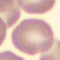

In [21]:
# put smear - n - into np array
print y
foo = Image.open('C:/Users/thoma/Documents/00GitHub/Cellavision_Trial_images/rbcs/{}'.format(yaz))
im = np.array(foo)

# init df[ix] object for b, which is the corresponding ix for n
df = data.ix[0]
label = df.label

# xLeft = df.x 
# yTop = df.y
# w = df.w
# h = df.h


# xRight = xLeft+w
# yBottom = yTop-h

# im = im[yBottom:yTop, xLeft:xRight]

x = df.x 
y = df.y
w = df.w
h = df.h


cw = w/2
ch = h/2

cx = x+w
cy = y-ch

im = im[cy-30:cy+30, cx-30:cx+30]
        
Image.fromarray(im)



In [22]:
im = np.array(foo)

In [23]:
import pdb, traceback, sys

In [24]:
def getdata_2(b, n):
    
    # put smear - n - into np array
    foo = Image.open('C:/Users/thoma/Documents/00GitHub/Cellavision_Trial_images/rbcs/{}'.format(n))
    im = np.array(foo)
#     # init df[ix] object for b, which is the corresponding ix for n
#     df = data.ix[b]
#     label = df.label
    
#     xLeft = df.x 
#     yTop = df.y
#     w = df.w
#     h = df.h


#     xRight = xLeft+w
#     yBottom = yTop-h

#     im = im[yBottom:yTop, xLeft:xRight]

#     return im, label
        

In [34]:
# get array data from smear with label
# n = total number of cells 

# cx and cy on cropped images 32x32 or 48x48 return im to X and label to Y 

X = []
Y = []
IDs = []
for n in data.image.iteritems():

    index_obj = data.ix[n[0]]
    index = n[0]
    image = index_obj.image
    print index, image
    try:
        x, y = getdata_2(index, image)
    except:
        type, value, tb = sys.exc_info()
        traceback.print_exc()
        raise
        
    X.append(x)
    Y.append(y)
    IDs.append(n)

# X = np.array(X)
# Y = np.array(Y)
# IDs = np.array(IDs)


0 681200836HV_002.jpg


Traceback (most recent call last):
  File "<ipython-input-34-9fd1781ec084>", line 16, in <module>
    x, y = getdata_2(index, image)
TypeError: 'NoneType' object is not iterable


TypeError: 'NoneType' object is not iterable

In [47]:
len(X)

0

In [ ]:
###############################################################3
# for n, im in data.iterrows():
#     y = im.y
#     x = im.x
#     w = im.w
#     h = im.h
#     label = im.label
    
#     X.append((n,3,w,h))
#     Y.append(label)
#     IDs.append(n)
    
# X = np.array(X)
# Y = np.array(Y)
# IDs = np.array(IDs)

In [ ]:
import hickle

In [ ]:
GROUPS = {'Normal': (1,),
          'Abnormal': (2,),
         }

In [ ]:
# just X and Y is OK 

d = {}
d['X'] = X
d['y'] = Y
d['GROUPS'] = GROUPS

In [ ]:
# (X, Y) -- ((N,3,w,h), label)

hickle.dump(d, open('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/dataset.hkl','w'))